Autores: Alexandre Liermann, Gustavo Guerreiro e João Martinho.

# Implementação de Classificação de Imagens de Ressonância Magnética para Diagnóstico de Alzheimer Usando CNN em TensorFlow

Importações das bibliotecas necessárias

In [88]:
import tensorflow as tf
import pathlib

Definindo os diretórios do dataset

In [89]:
dir_dados = pathlib.Path('Dataset Alzheimer Segregado')
dir_treino = dir_dados / 'train'
dir_teste = dir_dados / 'test'

Carregando os imagens automaticamente para o TensorFlow.

In [90]:
img_height = 176
img_width = 208
batch_size = 32

dataset_treino = tf.keras.utils.image_dataset_from_directory(
    dir_treino,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

dataset_teste = tf.keras.utils.image_dataset_from_directory(
    dir_teste,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

print('Classes encontradas:', dataset_treino.class_names)

Found 5121 files belonging to 3 classes.
Found 1279 files belonging to 3 classes.
Classes encontradas: ['ModerateMildDemented', 'NonDemented', 'VeryMildDemented']


Normalizando a imagem para ficar mais natural para a CNN.

In [91]:
def normalizar_img(imagem, rotulo):
    imagem = tf.cast(imagem, tf.float32) / 255.0
    return imagem, rotulo

dataset_treino = dataset_treino.map(normalizar_img)
dataset_teste = dataset_teste.map(normalizar_img)

Configurando operações de cache e prefetch para aprimorar desempenho.

In [92]:
from tensorflow.data import AUTOTUNE

dataset_treino = dataset_treino.cache().shuffle(800).prefetch(buffer_size=AUTOTUNE)
dataset_teste = dataset_teste.cache().prefetch(buffer_size=AUTOTUNE)

Iniciando a configuração do modelo.

In [93]:
from tensorflow.keras import layers, models

modelo = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(3, activation='softmax'),
])



C:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilando o modelo com a definição de otimizador (Adaptive Moment Estimation), perda e métricas.

In [94]:
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Treinando o modelo

In [95]:
history = modelo.fit(
    dataset_treino,
    validation_data=dataset_teste,
    epochs=5
)

Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 83s 475ms/step - accuracy: 0.5255 - loss: 0.9742 - val_accuracy: 0.5825 - val_loss: 0.9127
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 74s 455ms/step - accuracy: 0.7198 - loss: 0.6479 - val_accuracy: 0.5700 - val_loss: 1.0577
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 78s 487ms/step - accuracy: 0.8668 - loss: 0.3297 - val_accuracy: 0.5778 - val_loss: 1.2089
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 72s 448ms/step - accuracy: 0.9522 - loss: 0.1453 - val_accuracy: 0.5536 - val_loss: 1.7480
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 86s 533ms/step - accuracy: 0.9805 - loss: 0.0681 - val_accuracy: 0.5559 - val_loss: 2.2866


Avaliando os resultados do treino

In [96]:
perda, acuracia = modelo.evaluate(dataset_teste)

print(f"Acurácia: {acuracia:.2f}")
print(f"Perda: {perda:.2f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.5559 - loss: 2.2866
Acurácia: 0.56
Perda: 2.29


Métricas mais avançadas com sklearn

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

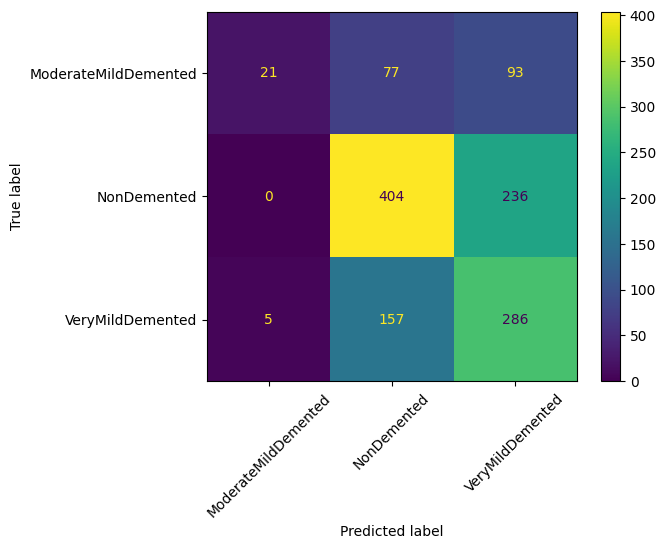

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from matplotlib import pyplot as plt

y_verdadeiro = []
y_previsto = []

for imagens, rotulos in dataset_teste:
    previsoes = modelo.predict(imagens)
    y_verdadeiro.extend(rotulos.numpy())
    y_previsto.extend(np.argmax(previsoes, axis=1))

classes = ['ModerateMildDemented', 'NonDemented', 'VeryMildDemented']
cm = confusion_matrix(y_verdadeiro, y_previsto)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(xticks_rotation=45)
plt.show()